In [55]:
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

from models.QRN18 import QRN18
from dataset import QaidaDataset
from utils.framework import calculate_accuracy, test_loop
from utils.transform import get_transform

In [101]:
target_classes = 18569
fc_neurons = []
device = "cuda"
batch_size = 128

model = QRN18(pre_trained=False,
              backbone="QRN18_18569", 
              num_classes=target_classes, 
              model_config="../data/config/model.json", 
              fc_neurons=[])

saved_state = torch.load("../../../qaida/data/18569_scratch_best.bin")

## TODO: Remove hot fix
    
updated_saved_dict = {key: value for (key, value) in saved_state.items() if key not in 
                      ["_model.fc.weight", "_model.fc.bias"]}

updated_saved_dict["_model.fc.fc.weight"] = saved_state["_model.fc.weight"]
updated_saved_dict["_model.fc.fc.bias"] = saved_state["_model.fc.bias"]

## End hot fix

### Load and prepare model

In [102]:
model.load_state_dict(updated_saved_dict)
model.eval()
model.double()
print("Model loaded")

Model loaded


### Create dataset and dataloader

In [105]:
dataset = QaidaDataset("../../../../Datasets/Qaida/train/", 
                        transform=get_transform("test"), 
                        max_classes=target_classes)

dataloader = DataLoader(dataset, 
                        batch_size=batch_size, 
                        shuffle=False, 
                        num_workers=4)

Selecting max classes to : 18569


### Test on a random image

Correct
Prediction 5259
Ground truth 5259


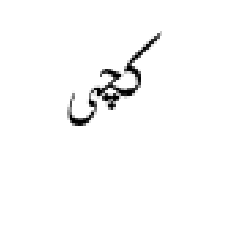

In [135]:
idx = np.random.randint(len(dataset))
im, lbl = dataset[idx]

# get prediction
pred = model(im[np.newaxis, : ])
pred_class = np.argmax(pred.detach().numpy())

# show image
plt.imshow(np.transpose(im, [1,2,0]))
plt.axis("off")

print("{}\nPrediction {}\nGround truth {}".format("Correct" if pred_class == lbl else "Wrong",
                                                  pred_class, 
                                                  lbl))